# Week 3 Lecture 2a: Computational efficiency, more on sorting

In [1]:
%run "boaz_utils.ipynb"

# Analyzing how fast algorithms run

We always care about how fast an algorithm runs.

**O notation** focuses on how the time **scales** when inuput work. We focus on **worst case complexity**

In [3]:
def star():
    print("*",end="")

## O(1)

In [4]:
#assigning a variable
L= list(range(1000))
L[0]=5 #doesn't matter how big L is
L[10]=10

In [5]:
star()

*

## O(n) linear time 


In [5]:
def find_star(L,s):
    for i in range(len(L)):
        star()
        if L[i]==s: return i
    return -1

L = range(200)
find_star(L,114)

*******************************************************************************************************************

114

## O(n${^2}$) quadratic time

In [6]:
def intersection_star(L1,L2):
    intersection = []
    for i in L1:
        for j in L2:
            star()
            if i==j: intersection += [i]
    return intersection

L1= range(0,50,3) 
L2= range(0,50,2) 
intersection_star(L1,L2)

*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

[0, 6, 12, 18, 24, 30, 36, 42, 48]

## O(n${^3}$) cubic time

In [13]:
def intersect3_star(L1,L2,L3):
    intersection =[]
    for i in L1:
        for j in L2:
            for k in L3:
                star()
                if i==j and j==k: intersection += [i]
    return intersection
L1 = range(0,50,2) 
L2 = range(0,50,3)
L3 = range(0,50,5)
intersect3_star(L1,L2,L3)

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

[0, 30]

## O (log(n))

In [8]:
def binsearch_star(L,s):
    start = 0
    end   = len(L)
    while start<end:
        star()
        mid = (start+end)//2
        if s<L[mid]: end = mid
        if s>L[mid]: start = mid+1
        if s==L[mid]: return mid
    return -1

L = range(1000)
binsearch_star(L,783)

**********

783

## O (n*log(n))


$n < n\log n < n^2$.

$n\log n$ is closer to $n$ than to $n^2$. 

We will see soon that (__Merge Sort__) has this runtime.

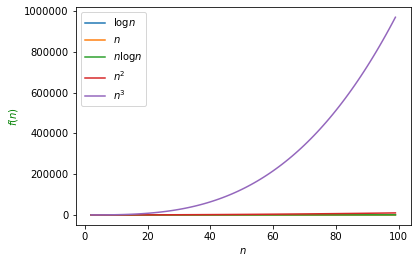

In [14]:
plotfunctions(lambda n:log(n), r'$\log n$', lambda n:n, r'$n$', lambda n:n*log(n), r'$n\log n$',
    lambda n:n*n, r'$n^2$', lambda n:n*n*n, r'$n^3$', n= 100)

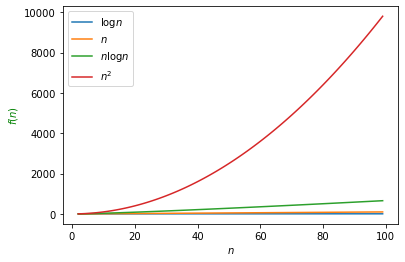

In [10]:
plotfunctions( lambda n:log(n), r'$\log n$', lambda n:n, r'$n$',
    lambda n:n*log(n), r'$n\log n$', lambda n:n*n, r'$n^2$', n= 100)

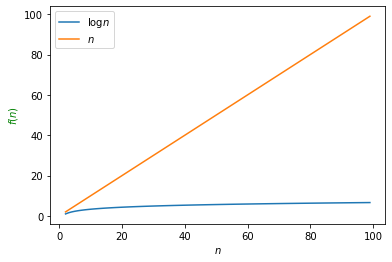

In [11]:
# n vs log n
plotfunctions(  lambda n:log(n), r'$\log n$', lambda n:n, r'$n$',     n= 100)

Comparing them for $n=10^9$

In [12]:
n=10**9

print(f"log n  \t= {log(n):,}  (nanoseconds)")
print(f"n \t= {n:,} (seconds)")
print(f"n log n\t= {n*log(n):,} (minutes)")
print(f"n^2 \t= {n*n:,} (years)")
print(f"n^3 \t= {n*n*n:,} (billions of years)")

log n  	= 29.897352853986263  (nanoseconds)
n 	= 1,000,000,000 (seconds)
n log n	= 29,897,352,853.986263 (minutes)
n^2 	= 1,000,000,000,000,000,000 (years)
n^3 	= 1,000,000,000,000,000,000,000,000,000 (billions of years)


# Recap of MergeSort and analyze on board

In [22]:
def merge(A, B):
    C = []
    i = j = 0
    while i<len(A) and j<len(B):
        if A[i] < B[j]:
            C += [A[i]]
            i += 1
        else:
            C += [B[j]]
            j += 1
    C += A[i:] + B[j:]
    return C

def merge_sort(L):
    if len(L) <= 1:
        return L[:]
    else:
        A = L[0:len(L)//2]
        B = L[len(L)//2:]
        return merge(merge_sort(A), merge_sort(B))

In [23]:
merge_sort(list(range(10,0,-1)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Another example: different algorithms for the same problem can have different runtimes

__Exercise:__ Given list `L` and and value `x`,  partition `L` so that values from `0` to `i-1` are smaller than `x` and value from `i` onwards are equal or larger to `x`. Return `i`

__Solution 1:__  Use selection sort to sort L then scan to find the first position where the value is at least `x`

In [13]:
def find_min_index(L):
    currmin = 0
    for i in range(1,len(L)):
        if L[i]<L[currmin]: currmin=i
    return currmin

In [14]:
def selection_sort(L):
    if len(L)<=1: return L
    for i in range(len(L)-1):
        j = i + find_min_index(L[i:])
        L[i],L[j] = L[j],L[i]
    return L

In [15]:
selection_sort([12,456,324,435,65])

[12, 65, 324, 435, 456]

In [16]:
def partition(L,x):
    selection_sort(L)
    for j in range(len(L)):
        if L[j]>= x: return j
    return len(L)

In [17]:
L = [random.randint(1,100) for i in range(10)]
print(f"Before: {L}")
i = partition(L,50)
print(f"After: {L}")
print(f"i={i}, L[i-1]={L[i-1]}, L[i]={L[i]}")

Before: [100, 15, 12, 51, 40, 38, 6, 26, 3, 64]
After: [3, 6, 12, 15, 26, 38, 40, 51, 64, 100]
i=7, L[i-1]=40, L[i]=51


## Is this the most efficient version?

__Steps in construction of algorithms:__ <br>
1) Understand __what__ is the problem to solve. <br>
2) Find __how__ to solve the problem, first  _high level_/_pseudocode_ and then _code_.<br>
3) Analyze __why__ algorithm solves the problem.<br>
4) Analyze __how fast__ it runs.

__Reorder:__ Input `L` of length `n`, value `x`:<br>
Set `i=0`, `j=n-1` <br>
Increase `i` and decrease `j` until we find "mismatched pair": `L[i]>=x` and `L[j]<x` <br>
Switch such pairs and continue until `i>=j`

In [ ]:
def partition2(L,x):
    i = 0; j = len(L)-1
    while i<j:
        if L[i]<x: i+= 1
        elif L[j]>= x: j -= 1
        else: L[i],L[j]=L[j],L[i]
    return j

In [84]:
L = [random.randint(1,100) for i in range(6)]
print(f"Before: {L}")
i = partition2(L,50)
print(f"After: {L}")
print(f"i={i}, L[i-1]={L[i-1]}, L[i]={L[i]}")

Before: [64, 88, 13, 10, 28, 72]
After: [28, 10, 13, 88, 64, 72]
i=3, L[i-1]=13, L[i]=88


__Analysis:__ (on board)
    
1. __Why__ it is correct

2. __How fast__ why does it run in $O(n)$ time


In [ ]:
inputs = [([random.randint(1,n) for i in range(n)],int(n/2)) for n in range(10,600,60)]
inputs1 = [list(a) for a in inputs]
inputs2 = [list(a) for a in inputs]

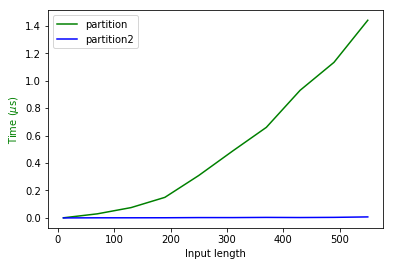

In [85]:
compare_times(partition,partition2,inputs)

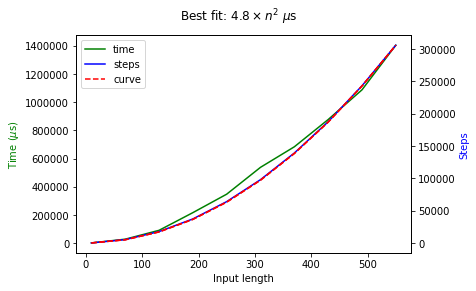

In [87]:
timer(partition,inputs1);

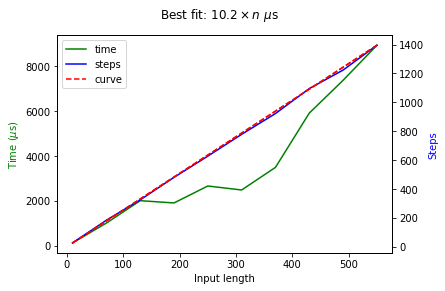

In [86]:
timer(partition2,inputs2);